# Análise descritiva dos dados (EDA)

1. Construa uma análise descritiva extraindo conhecimento das variáveis e apresentando quais insights podem ser obtidos a partir delas;

2. Mostre-nos um caminho para selecionar **graficamente** as variáveis mais ou menos importantes para cada problema, como elas se relacionam e porquê.

3. Em cada problema descreva quais outras técnicas poderiam ser aplicadas e porquê você não as escolheu.

4. Utilize os dados: eda_receitas_data.zip

### Sumário (ToC)



### Imports

In [1]:
import matplotlib.pyplot as plt
import missingno as msno
import numpy as np
import pandas as pd
import scipy.stats as ss
import seaborn as sns
from icecream import ic

In [2]:
from sklearn.impute import KNNImputer
from sklearn.preprocessing import MultiLabelBinarizer

In [3]:
import warnings

warnings.simplefilter(action="ignore", category=FutureWarning)

In [4]:
plt.style.use(['seaborn-notebook'])
sns.set_style("darkgrid", {"grid.color": ".6", "grid.linestyle": ":"})

## Data Inspection
analisando a estrutura dos dados

In [5]:
df = pd.read_json("receitas.json")

In [6]:
init_samples = df.shape[0]

print(df.shape)
print(f"The dataset has {df.shape[0]} rows and {df.shape[1]} columns.")

(20130, 11)
The dataset has 20130 rows and 11 columns.


In [7]:
df.head()

,directions,fat,date,categories,calories,desc,protein,rating,title,ingredients,sodium
0,"[1. Place the stock, lentils, celery, carrot, ...",7.0,2006-09-01 04:00:00+00:00,"[Sandwich, Bean, Fruit, Tomato, turkey, Vegeta...",426.0,None,30.0,2.500,"Lentil, Apple, and Turkey Wrap","[4 cups low-sodium vegetable or chicken stock,...",559.0
1,[Combine first 9 ingredients in heavy medium s...,23.0,2004-08-20 04:00:00+00:00,"[Food Processor, Onion, Pork, Bake, Bastille D...",403.0,This uses the same ingredients found in boudin...,18.0,4.375,Boudin Blanc Terrine with Red Onion Confit,"[1 1/2 cups whipping cream, 2 medium onions, c...",1439.0
2,[In a large heavy saucepan cook diced fennel a...,7.0,2004-08-20 04:00:00+00:00,"[Soup/Stew, Dairy, Potato, Vegetable, Fennel, ...",165.0,None,6.0,3.750,Potato and Fennel Soup Hodge,"[1 fennel bulb (sometimes called anise), stalk...",165.0
3,[Heat oil in heavy large skillet over medium-h...,NaN,2009-03-27 04:00:00+00:00,"[Fish, Olive, Tomato, Sauté, Low Fat, Low Cal,...",NaN,The Sicilian-style tomato sauce has tons of Me...,NaN,5.000,Mahi-Mahi in Tomato Olive Sauce,"[2 tablespoons extra-virgin olive oil, 1 cup c...",NaN
4,[Preheat oven to 350°F. Lightly grease 8x8x2-i...,32.0,2004-08-20 04:00:00+00:00,"[Cheese, Dairy, Pasta, Vegetable, Side, Bake, ...",547.0,None,20.0,3.125,Spinach Noodle Casserole,"[1 12-ounce package frozen spinach soufflé, th...",452.0


In [8]:
df.columns

Index(['directions', 'fat', 'date', 'categories', 'calories', 'desc',
       'protein', 'rating', 'title', 'ingredients', 'sodium'],
      dtype='object')

In [9]:
df.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20130 entries, 0 to 20129
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype              
---  ------       --------------  -----              
 0   directions   20111 non-null  object             
 1   fat          15908 non-null  float64            
 2   date         20111 non-null  datetime64[ns, UTC]
 3   categories   20111 non-null  object             
 4   calories     15976 non-null  float64            
 5   desc         13495 non-null  object             
 6   protein      15929 non-null  float64            
 7   rating       20100 non-null  float64            
 8   title        20111 non-null  object             
 9   ingredients  20111 non-null  object             
 10  sodium       15974 non-null  float64            
dtypes: datetime64[ns, UTC](1), float64(5), object(5)
memory usage: 1.7+ MB


#### Insights 1:
- $1$ field tipo _data_ | $5$ fields tipo _float_ | $5$ fields tipo _object(string)_

- várias observações nulas a tratar

In [10]:
# evitando erro de tipagem
for column in df:
    df[column] = df[column].astype(df[column].dtype)

In [11]:
numeric_cols = df.select_dtypes(include=["number"]).columns
print(numeric_cols)

non_numeric_cols = df.select_dtypes(exclude=["number"]).columns
print(non_numeric_cols)

Index(['fat', 'calories', 'protein', 'rating', 'sodium'], dtype='object')
Index(['directions', 'date', 'categories', 'desc', 'title', 'ingredients'], dtype='object')


##### valores numéricos

In [12]:
df[numeric_cols].describe()

,fat,calories,protein,rating,sodium
count,1.590800e+04,1.597600e+04,15929.000000,20100.000000,1.597400e+04
mean,3.460975e+02,6.307857e+03,99.946199,3.713060,6.211474e+03
std,2.043102e+04,3.585851e+05,3835.616663,1.343144,3.328903e+05
min,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000e+00
25%,7.000000e+00,1.980000e+02,3.000000,3.750000,8.000000e+01
50%,1.700000e+01,3.310000e+02,8.000000,4.375000,2.940000e+02
75%,3.300000e+01,5.860000e+02,27.000000,4.375000,7.110000e+02
max,1.722763e+06,3.011122e+07,236489.000000,5.000000,2.767511e+07


##### valores literais

In [13]:
ic(df[non_numeric_cols].sample())

ic| df[non_numeric_cols].sample():                                              directions  \
                                   7158  [Make the Spicy Afghan Green Sauce: Combine al...   
                                   
                                                             date  \
                                   7158 2013-04-23 04:00:00+00:00   
                                   
                                                                                categories  \
                                   7158  [Lamb, Fourth of July, Yogurt, Father's Day, B...   
                                   
                                                                                      desc  \
                                   7158  We had to include this fantastic recipe becaus...   
                                   
                                                                 title  \
                                   7158  Pepper Monkey Lamb Meatballs    
      

,directions,date,categories,desc,title,ingredients
7158,[Make the Spicy Afghan Green Sauce: Combine al...,2013-04-23 04:00:00+00:00,"[Lamb, Fourth of July, Yogurt, Father's Day, B...",We had to include this fantastic recipe becaus...,Pepper Monkey Lamb Meatballs,"[1 bunch fresh cilantro, 1/2 to 1 jalapeño, de..."


In [14]:
print("de " + str(df.date.min()) + " até " + str(df.date.max()))

de 1996-09-01 20:47:00+00:00 até 2016-12-13 13:00:00+00:00


In [15]:
# estimativa de tags por receita
cats = df.categories.values.tolist()
y = []

In [16]:
for x in cats[50:60]:
    y.append(len(x))
    print(len(x))
np.mean(y)

17
9
16
13
9
15
12
17
9
11


12.8

#### Observations

* _List comprehension_ poderia ter sido usada, mas descartada devido a erros de tipagem ao calcular todos os valores

* Possivelmente os dados brutos estão gerando problemas

### Dicionário de Features

| feature |  | descrição |
| --- | --- | :------ |
| directions | --- | passo a passo com as intruções de preparo |
| fat | --- | quantidade de gordura na receita |
| date | --- | data em que a receita foi adicionada |
| __categories__ | --- | _tags_ que categorizam o tipo de receita |
| calories | --- | quantidade de calorias na receita |
| desc | --- | detalhes e feedback sobre a receita |
| protein | --- | quantidade de proteína na receita |
| __rating__ | --- | nota entre 0 a 5 da receita |
| title | --- | Nome dado à receita |
| ingredients | --- | ingredientes usados na receita |

#### Insights 2:
- **rating** é um promissor valor de *target* ou *rotulação*

- categories precisa de mais granularidade para análise

- desagregar `date` e `time` possibilita mais análises de insight

- A quantidade de categorias na receita e as tags em si tornam-se features interessantes

## Data quality

##### valores ausentes

In [17]:
# quantidade de valores ausentes por linha
df.isnull().sum().sort_values(ascending=False)

desc           6635
fat            4222
protein        4201
sodium         4156
calories       4154
rating           30
directions       19
date             19
categories       19
title            19
ingredients      19
dtype: int64

é plausível que a repetição do $nº 19$ não seja coincidência

<AxesSubplot:>

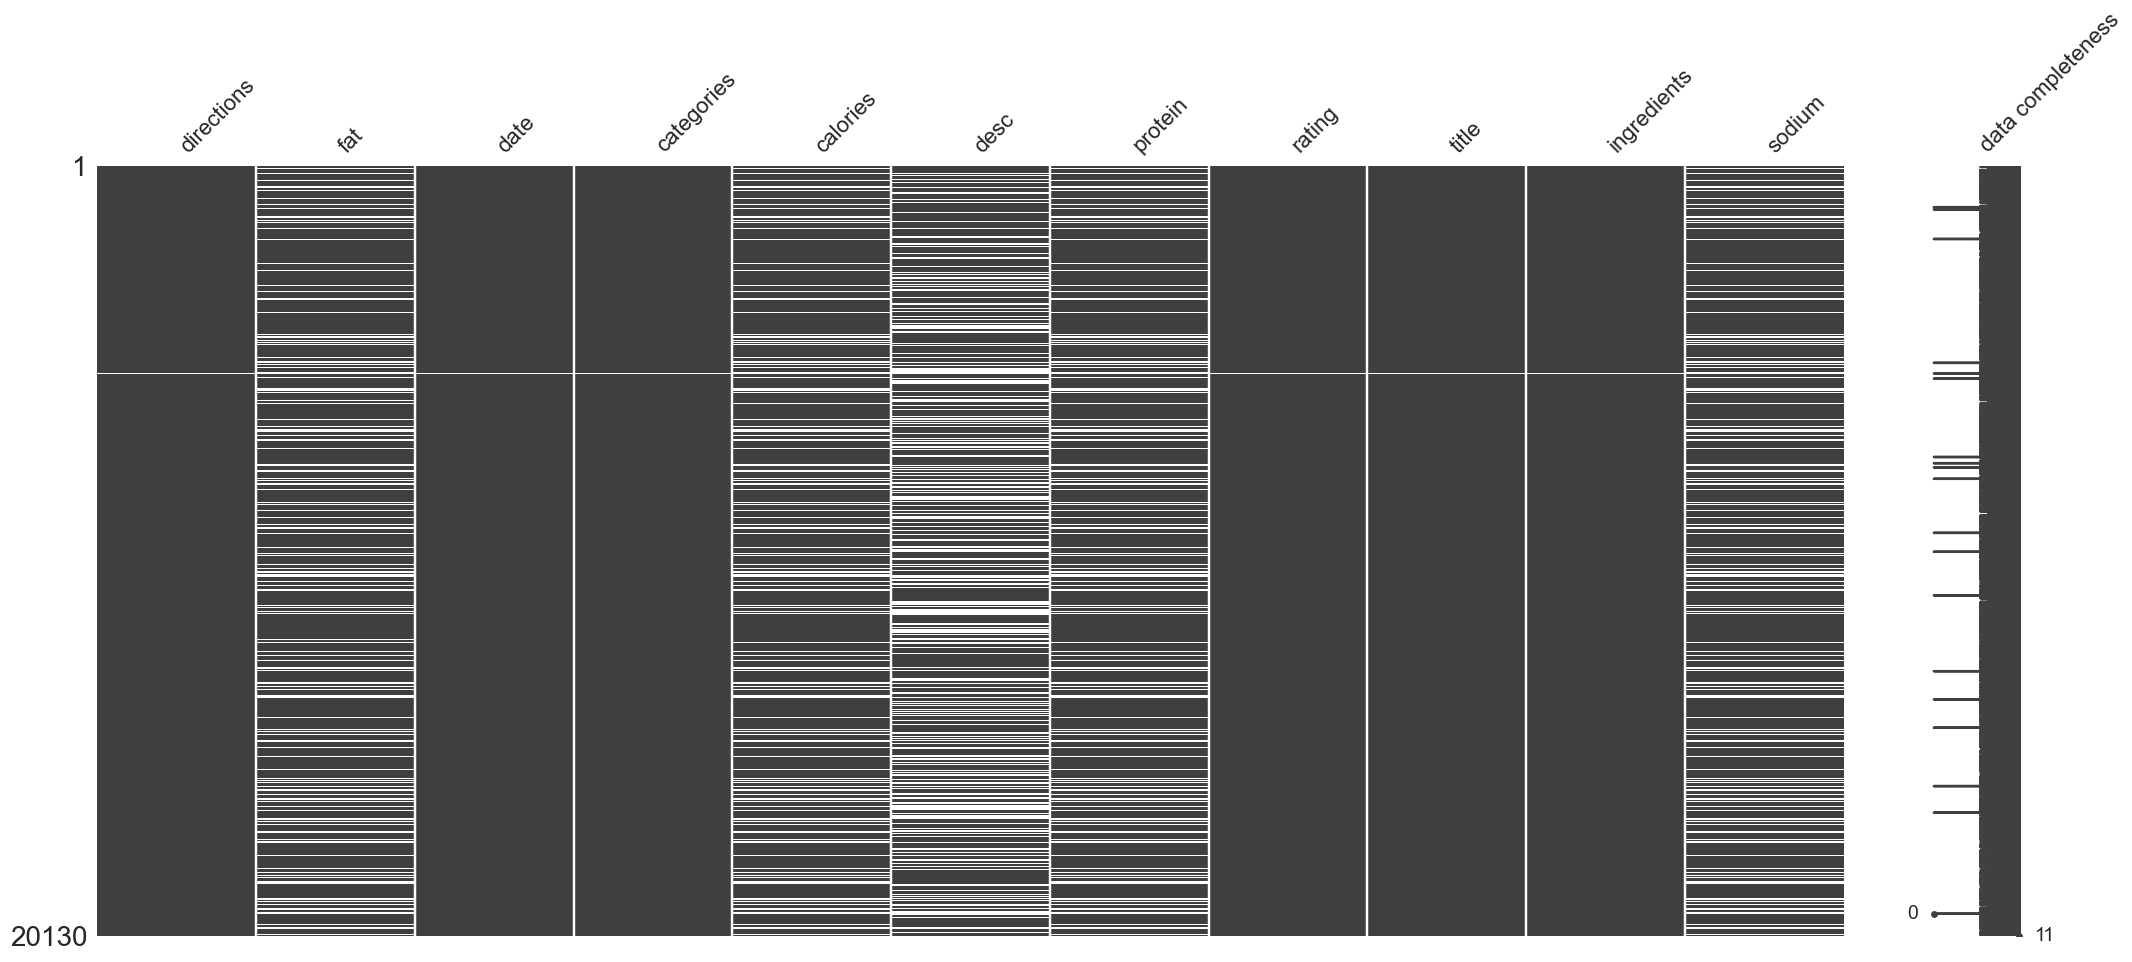

In [18]:
msno.matrix(df, labels=True)

há uma linha transversal na matrix, indicando linhas completamente vazias

In [19]:
ic(df[df.title.isnull()].shape[0])
df[df.title.isnull()]

ic| df[df.title.isnull()].shape[0]: 19


,directions,fat,date,categories,calories,desc,protein,rating,title,ingredients,sodium
1076,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1135,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1907,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5146,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5424,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5558,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7607,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7768,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7881,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8177,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


de fato, há $19$ colunas sem dados

    Precisam ser removidas

In [20]:
df.drop(df.loc[df.title.isnull()].index, axis=0, inplace=True)

In [21]:
df.isnull().mean().sort_values(ascending=False)

desc           0.328974
fat            0.208990
protein        0.207946
sodium         0.205708
calories       0.205609
rating         0.000547
directions     0.000000
date           0.000000
categories     0.000000
title          0.000000
ingredients    0.000000
dtype: float64

- `desc` possui mais de $30\%$ dos seus dados ausentes
- `rating` possui uma ínfima fração de seus dados ausentes, ainda assim, é um valor de target

        ambos precisam ser tratados

##### valores duplicados

In [22]:
ic(df.duplicated(["title", "date", "desc", "rating"]).value_counts())

ic| df.duplicated(["title", "date", "desc", "rating"]).value_counts(): False    18264
                                                                       True      1847
                                                                       dtype: int64


False    18264
True      1847
dtype: int64

In [23]:
df[df.duplicated(["title", "date", "desc", "rating"], keep="first")]

,directions,fat,date,categories,calories,desc,protein,rating,title,ingredients,sodium
340,[Brush both sides of nori with sesame oil. Spr...,NaN,2007-04-25 22:50:17+00:00,"[Backyard BBQ, Grill/Barbecue, Bon Appétit]",NaN,None,NaN,5.000,Seasoned Nori Wrappers,"[4 sheets nori (dried seaweed sheets), 2 teasp...",NaN
521,"[Preheat oven to 400°F., In a dry small heavy ...",1.0,2004-08-20 04:00:00+00:00,"[Bake, Cocktail Party, Low Cal, Spice, Gourmet]",21.0,This recipe can be prepared in 45 minutes or l...,0.0,3.750,Spiced Pita Toasts,"[4 teaspoons cumin seeds, 1 teaspoon coarse sa...",38.0
602,[Heat butter in a 3-quart heavy saucepan over ...,3.0,2004-08-20 04:00:00+00:00,"[Condiment/Spread, Fruit Juice, Citrus, Christ...",194.0,This recipe is an accompaniment for Buffalo Pr...,2.0,3.750,Orange Balsamic Glaze,"[1 1/2 tablespoons unsalted butter, 1 cup fine...",697.0
718,[Mince garlic and mash to a paste with a pinch...,7.0,2004-08-20 04:00:00+00:00,"[Bread, Condiment/Spread, Fry, No-Cook, Quick ...",95.0,None,1.0,0.000,Garlic Baguette Crumbs,"[1 garlic clove, 2 tablespoons olive oil, 1/4 ...",103.0
806,"[In a large bowl, combine all of the ingredien...",1.0,2004-08-20 04:00:00+00:00,"[Condiment/Spread, Sauce, Fruit, Vinegar, Appl...",262.0,The word chutney comes from the Hindustani cha...,2.0,4.375,Golden Pineapple Chutney,"[1/2 cup sugar, 1/2 medium red onion, diced, 1...",438.0
...,...,...,...,...,...,...,...,...,...,...,...
20110,[Makes enough spice rub for two whole chickens...,0.0,2013-06-10 04:00:00+00:00,"[Low Fat, Vegetarian, Quick & Easy, Spice, Veg...",16.0,You can use this simple formula to wake up the...,0.0,4.375,4-3-2-1 Spice Rub,"[4 tablespoons kosher salt, 3 tablespoons brow...",2292.0
20117,"[Bring half-and-half with cauliflower, covered...",28.0,2006-05-16 20:12:06+00:00,"[Milk/Cream, Blender, Vegetable, Side, Vegetar...",364.0,The leftover cooking liquid makes the perfect ...,11.0,3.125,Cauliflower Purée,"[1 quart half-and-half, 1 head cauliflower (2 ...",642.0
20119,"[In a large pot, place the chicken legs, bay l...",59.0,2012-10-10 04:00:00+00:00,"[Wine, Chicken, Herb, Poultry, Dinner, Simmer,...",843.0,"My brother, Al, is an inspiring teacher at Jam...",59.0,2.500,Chicken with White Wine and Herbs,"[8 chicken legs, 3 bay leaves, 1 teaspoon drie...",351.0
20120,"[Bring all ingredients to a simmer, covered di...",NaN,2006-05-16 20:12:06+00:00,"[Food Processor, Fruit, Side, Vegetarian, Date...",NaN,This recipe is an accompaniment for Rack of La...,NaN,2.500,Date Purée,"[3 cups pitted dates (14 ounces), 1 (750-ml) b...",NaN


> Considerando que esta base tenha origem em um site de _reviews_, a repetição de alguns valores são aceitáveis ao modelo de negócio, mas nem todos. Por isso, _reviews_ muito similares a exemplos anteriores isto é, em que `título`, `data`, `descrição` e `nota` são exatamente iguais, serão removidas em sequência

##### valores únicos

In [24]:
unique_values = df[numeric_cols].nunique().sort_values(ascending=False)

ic| unique_values: sodium      2436
                   calories    1860
                   fat          326
                   protein      282
                   rating         8
                   dtype: int64


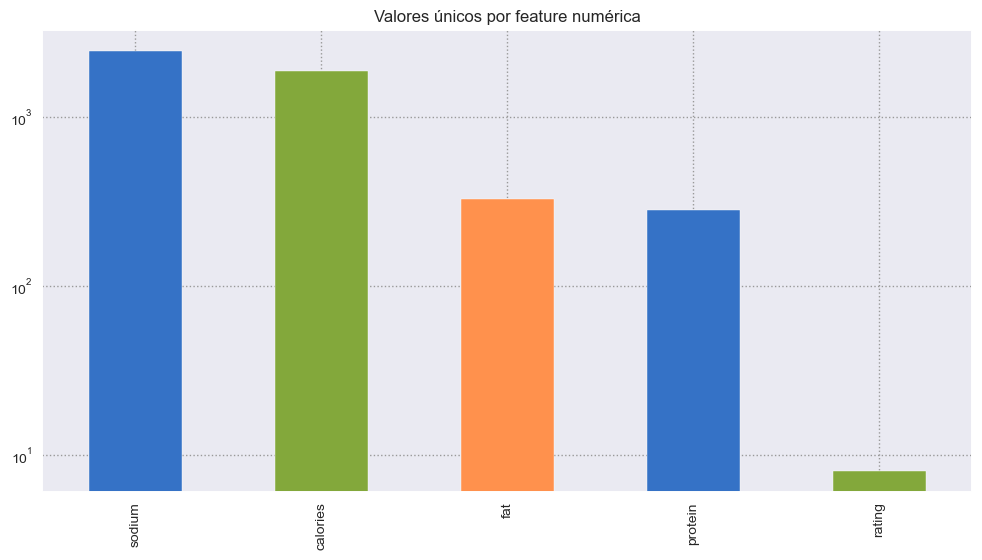

In [25]:
ic(unique_values)
unique_values.plot.bar(
    logy=True, figsize=(12, 6), title="Valores únicos por feature numérica", color=['b', 'g', 'y']
);

In [26]:
cats = df["categories"].tolist()
# percorre todas as listas de tags e dispõe em uma única
cats_flat = [i for cat in cats for i in cat]
cats_flat = pd.Series(cats_flat)
ic(len(cats_flat.value_counts()));

ic| len(cats_flat.value_counts()): 674


#### Observations

- Existem um total de $674$ tags diferentes

- Em primeira mão, podemos utilizar o princípio de Pareto $|80:20|$ para analisar apenas os $20\%$ das tags mais utilizadas

In [27]:
unique_values = cats_flat.value_counts()[: int(674 / 5)]
len(unique_values)

134

ic| unique_values: Bon Appétit      9355
                   Peanut Free      8390
                   Soy Free         8088
                   Tree Nut Free    7044
                   Vegetarian       6846
                                    ... 
                   Fat Free          376
                   Cream Cheese      375
                   Fennel            371
                   Rosemary          371
                   Corn              371
                   Length: 134, dtype: int64


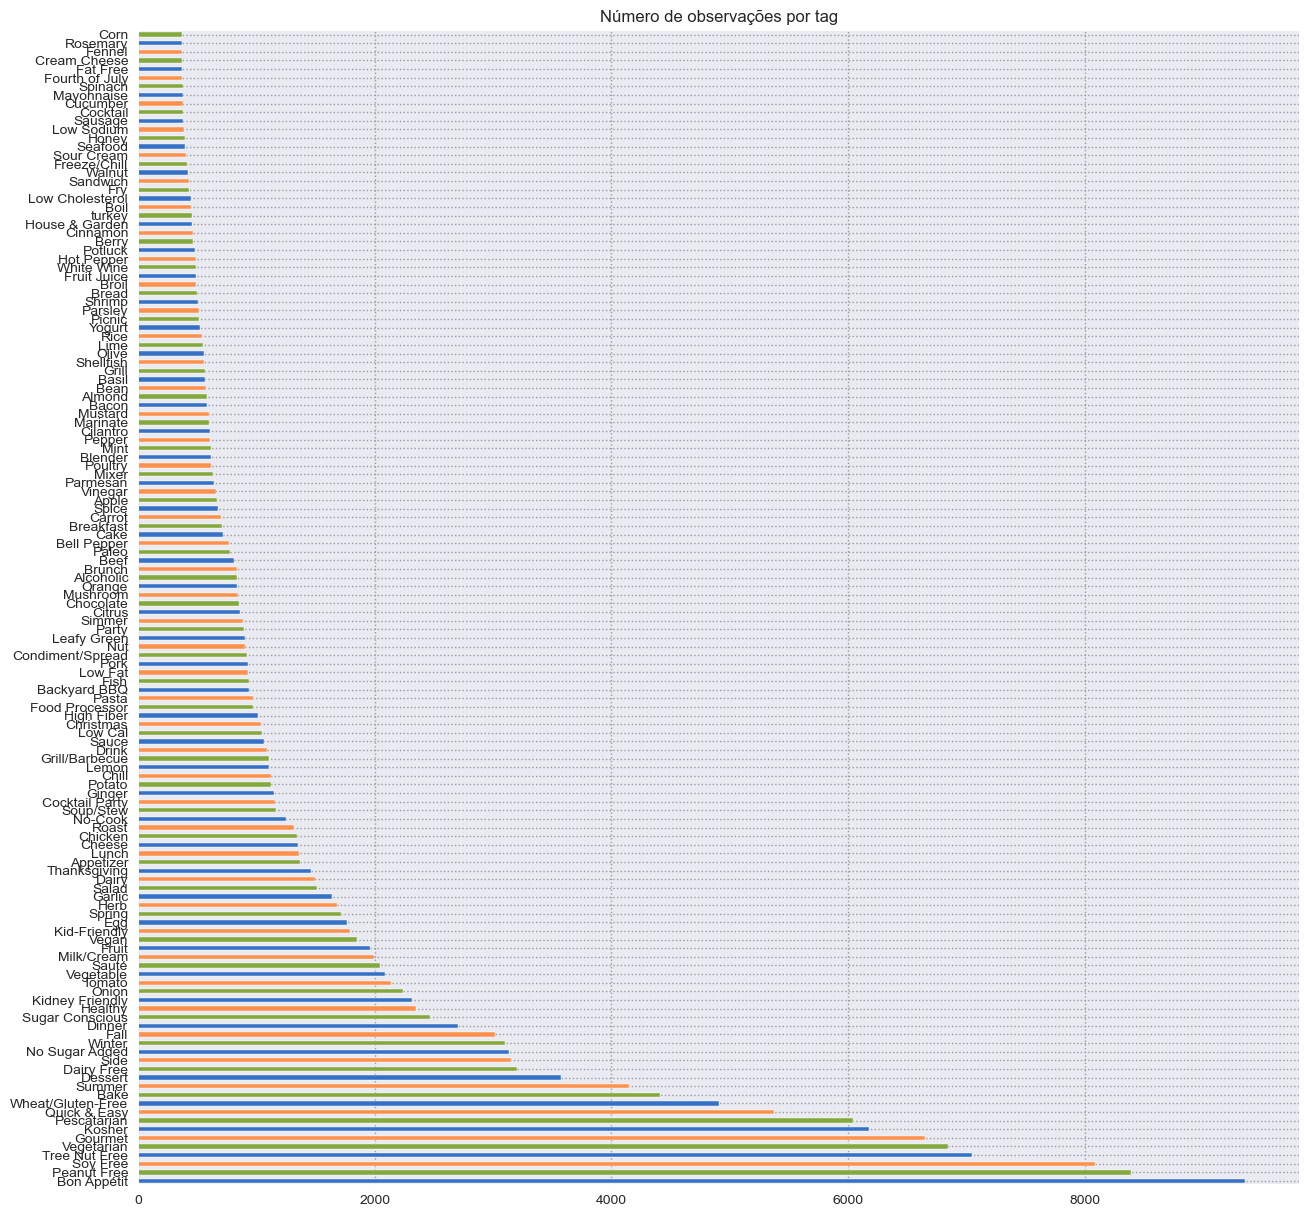

In [28]:
ic(unique_values)
unique_values.plot.barh(
    logy=False,
    figsize=(15, 15),
    title="Número de observações por tag",
    color=["b", "g", "y"],
);

#### Insights 3:

- _tags_ acima de $2000$ observações parece um número razoável para medir categorias relevantes

- Assim como os nutrientes, podemos observar a presença das tags nas receitas e correlacionar suas ocorrências com o `rating` assinalado

In [29]:
tags_2000 = list(unique_values[unique_values > 2000].index)
len(tags_2000)

26

## Data Wrangling
___Cleaning, Feature Engineering and Preprocessing___

#### To-Do:

1. Remover as amostras mais incompletas
    1. ~~sem valores~~
    2. feature importantes faltantes
    2. muitas features faltantes


2. Remover valores duplicados


3. Gerar novas features
    1. quantidade de tags
    2. tags (one-hot)
    3. data e hora


4. Completar valores faltantes com _Imputer_


5. Análise de irregularidades
    1. Outliers
    2. Inconsistências

---

##### 1. removendo `desc`,`ingredients` e  removendo amostras com `rating` ausente

In [30]:
df.drop(columns=["desc","ingredients"], inplace=True)
df.dropna(subset="rating", inplace=True)

Verify changes

In [31]:
missing_cols = df.isnull().mean().sort_values(ascending=False)
missing_cols

fat           0.208905
protein       0.207861
sodium        0.205622
calories      0.205522
directions    0.000000
date          0.000000
categories    0.000000
rating        0.000000
title         0.000000
dtype: float64

##### 2. removendo receitas duplicadas

In [32]:
df.drop_duplicates(["title", "date", "rating"], keep="first", inplace=True)
df.shape

(18211, 9)

##### 3. features novas

In [33]:
cats = df.categories.values.tolist()
cats_len = [len(i) for i in cats]
df["num_categories"] = cats_len

Para gerar as features de categorias, o mais método eficiente e similar ao formato de `One-Hot Encoder` é o método de `MultiLabelBinarizer`

In [34]:
mlb = MultiLabelBinarizer()
df_X = df.join(
    pd.DataFrame(
        mlb.fit_transform(df.pop("categories")), columns=mlb.classes_, index=df.index
    )
)

resetando o index após todas as remoções

In [45]:
df_X.reset_index(inplace=True, drop=True)

##### 4. completando os valores numéricos restantes

poderia-se usar um `SimpleImputer` para inserir os valores restante, porém a possibilidade de utilizar um algoritmo de `KNN` é mais otimizada e eficiente por predizer valores, ao invés de inserir estimadores estatísticos simples

In [36]:
KNN_imp = KNNImputer(missing_values=np.nan, n_neighbors=5)

In [37]:
X_num_raw = df_X[numeric_cols]
cols_num = X_num_raw.columns
X_num = pd.DataFrame(KNN_imp.fit_transform(X_num_raw))
# devolvendo os nomes das colunas
X_num.columns = cols_num

In [46]:
X = df_X[["title", "date", "num_categories"]].join(X_num, how="right").join(df_X[tags_2000], how="right")
X.head()

,title,date,num_categories,fat,calories,protein,rating,sodium,Bon Appétit,Peanut Free,...,Winter,Fall,Dinner,Sugar Conscious,Healthy,Kidney Friendly,Onion,Tomato,Vegetable,Sauté
0,"Lentil, Apple, and Turkey Wrap",2006-09-01 04:00:00+00:00,11,7.0,426.0,30.0,2.500,559.0,0,0,...,0,0,0,0,0,0,0,1,1,0
1,Boudin Blanc Terrine with Red Onion Confit,2004-08-20 04:00:00+00:00,11,23.0,403.0,18.0,4.375,1439.0,1,0,...,1,0,0,0,0,0,1,0,0,0
2,Potato and Fennel Soup Hodge,2004-08-20 04:00:00+00:00,7,7.0,165.0,6.0,3.750,165.0,0,0,...,0,0,0,0,0,0,0,0,1,0
3,Mahi-Mahi in Tomato Olive Sauce,2009-03-27 04:00:00+00:00,17,24.0,1881.0,35.0,5.000,190.8,1,1,...,0,0,1,0,1,0,0,1,0,1
4,Spinach Noodle Casserole,2004-08-20 04:00:00+00:00,11,32.0,547.0,20.0,3.125,452.0,1,0,...,0,1,0,0,0,0,0,0,1,0


#### Observations
- De forma geral, temos por fim uma exibição similar à estrutura final dos dados a serem analisados

- Os métodos em sequência se dão pela investigação, entendimento e explicação (_ou até mesmo a tentativa de explicação_) dos dados presentes

##### 5. Investigando outliers e inconsistências

Valores serão considerados como __outliers__ pelo método de intervalo interquartil ( $IIQ$ ou $IQR$ ), assumindo valores válidos apenas entre o limite inferior ( $LI$ ou _lower whisker_) e o limite superior ( $LS$ ou _upper whisker_), por padrão descritos assim:

$LI = Q_1 - 1.5 \times IQR$

$LS = Q_3 + 1.5 \times IQR$

Essa convenção traz equivalência ao critério de  $Z_{score} \ (\sigma) > 3$, uma outra maneira de detectar __outliers__, porém menos interpretável comparado ao _box plot_

> Visualização do Box plot em uma Gaussiana

<img src="Boxplot_e_Z-score.png" alt="drawing" width="400"/>

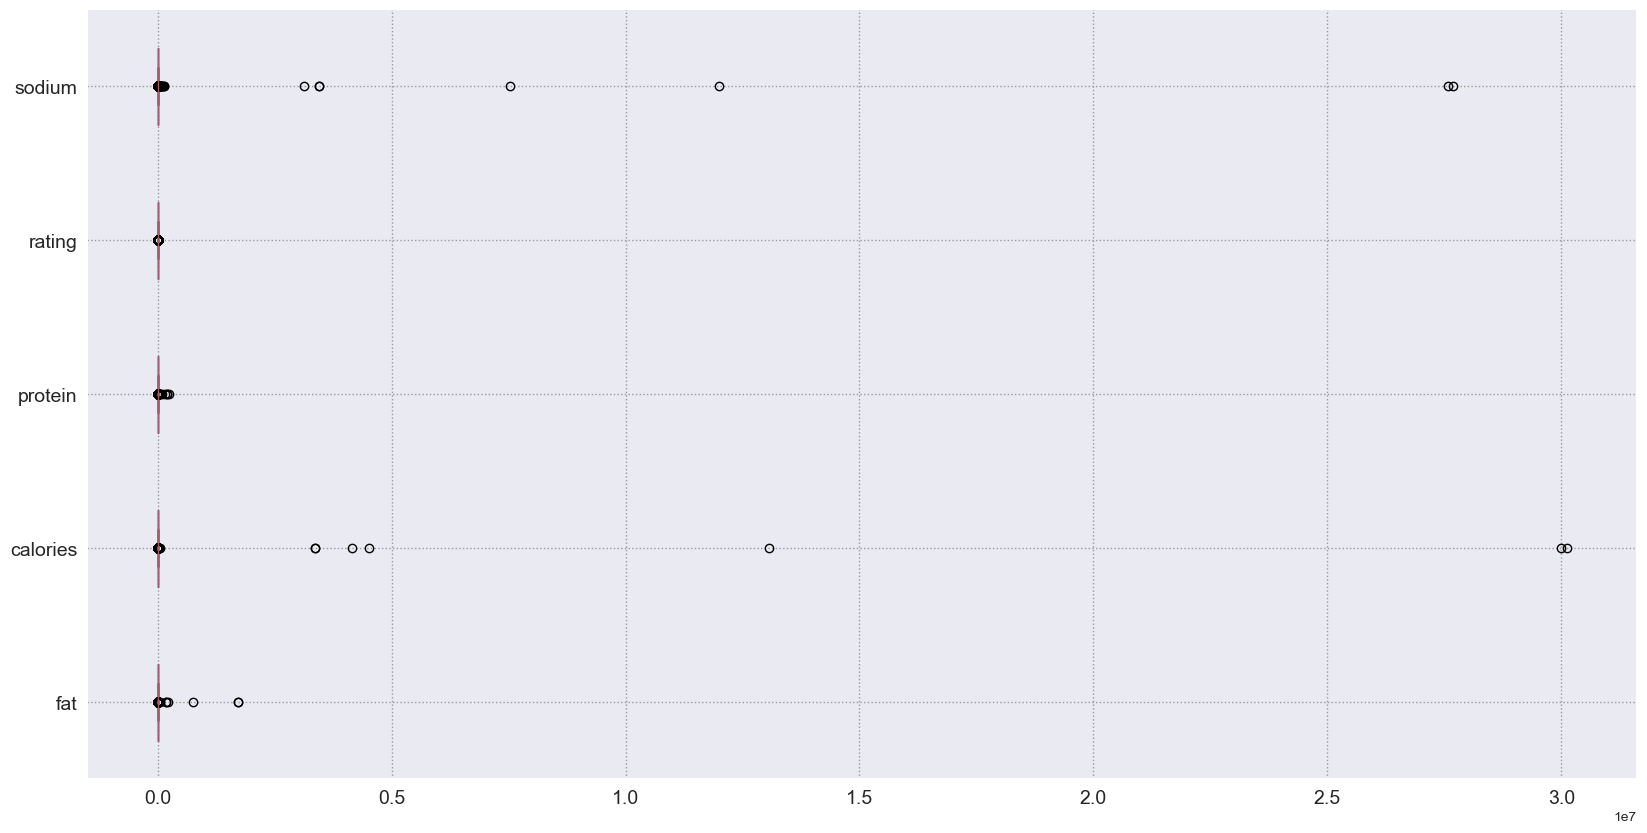

In [39]:
plt.figure(figsize=(20, 10))
X[numeric_cols].boxplot(vert=False, fontsize=14)
plt.show()

In [68]:
def outlier_iqr(dados, feature):
    Q1 = dados[feature].quantile(0.25)
    Q3 = dados[feature].quantile(0.75)
    IQR = Q3 - Q1
    LI = Q1 - 1.5 * IQR
    LS = Q3 + 1.5 * IQR
    outliers = dados[(dados[feature] < LI) | (dados[feature] > LS)]
    X.boxplot(column=feature, return_type="axes", figsize=(6, 4), grid=True)
    plt.show()
    return outliers

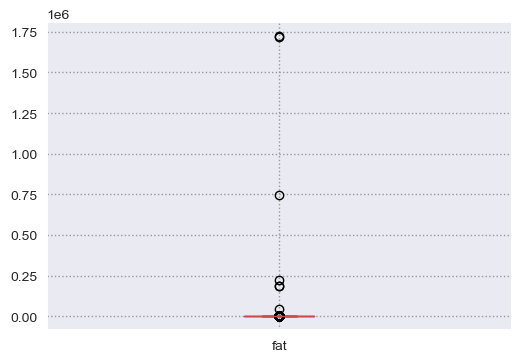

10786    1722763.0
6168     1716279.0
17906     747374.0
1292      221495.0
6679      186660.0
           ...    
11760         72.0
2421          72.0
11857         72.0
17627         72.0
6893          72.0
Name: fat, Length: 1049, dtype: float64 


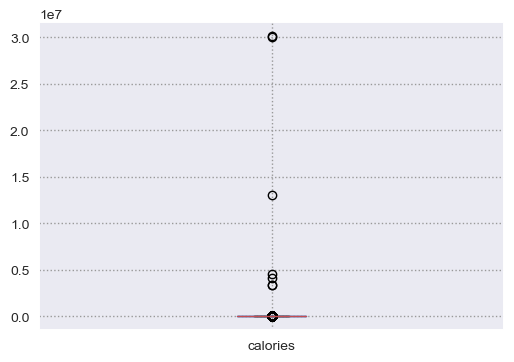

10786    30111218.0
6168     29997918.0
17906    13062948.0
2931      4518216.0
1292      4157357.0
            ...    
5681         1597.0
15177        1596.0
3894         1593.0
2511         1592.0
17500        1591.0
Name: calories, Length: 1030, dtype: float64 


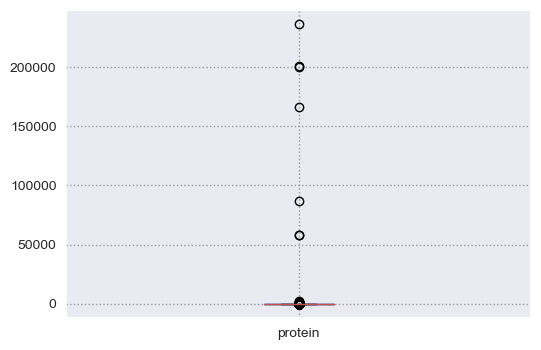

1292     236489.0
10786    200968.0
6168     200210.0
2931     166471.0
17906     87188.0
           ...   
8432         75.0
8581         75.0
8818         75.0
2986         75.0
2308         75.0
Name: protein, Length: 768, dtype: float64 


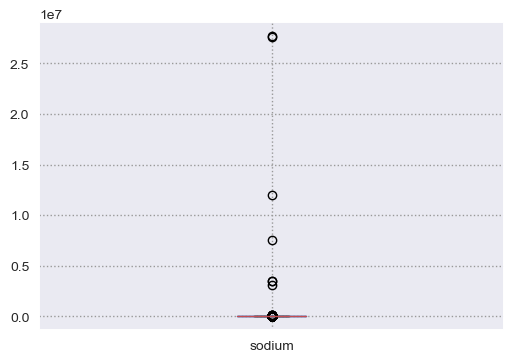

10786    27675110.0
6168     27570999.0
17906    12005810.0
2931      7540990.0
6679      3449512.0
            ...    
7593         1840.0
9700         1840.0
10474        1836.0
1407         1835.0
1614         1835.0
Name: sodium, Length: 896, dtype: float64 


In [77]:
outliers = set()
for i in X[numeric_cols].drop(columns='rating').columns:
    v = outlier_iqr(X[numeric_cols], i)[i]
    outliers.update(v.index)
    print(v.sort_values(ascending=False), '\n========')

percentual de outliers

In [79]:
print(len(outliers))
round(len(outliers) / len(X) * 100, 4)

2374


13.0361

#### Insights 4:
- Mesmo que o cálculo em $ IQR $ assuma que `rating` possua outliers, este é o valor de target e não devem ser tirados em primeira análise

- os outliers em $\sigma > 3$ representam $13\%$ da base total, o que faz sua remoção um trade-off custoso porém pertinente

removendo outliers

In [90]:
X.drop(index=outliers, inplace=True)
final_samples = X.shape[0]

## Data Visualization
_Visualizações e Testes_

investigação do conteúdo 